In [13]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer

# Import all data

In [14]:
#Load data

#Set parameter
dataset = 'train'

#Load data
df_ = pd.read_csv(os.path.join('data',dataset + ".csv"))
df = df_.copy()

df_kills = pd.read_csv('kills_columns_grouped.csv', sep=',')
df_monsters = pd.read_csv('monsters_columns_grouped.csv', sep=',')
df_towers = pd.read_csv('towers_columns_grouped.csv', sep=',')
df_gold = pd.read_csv('gold_columns_grouped.csv', sep=',')

In [5]:
! explorer.exe .

In [15]:
df = pd.merge(df, df_kills,  on = 'game_id', how ='left')
df = df.merge(df_monsters,  on = 'game_id', how ='left')
df = df.merge(df_towers,  on = 'game_id', how ='left')
df = df.merge(df_gold,  on = 'game_id', how ='left')

In [16]:
#First look
display(df.head(5))
df.shape

,Year,Season,blueTeamTag,bResult,redTeamTag,gamelength,game_id,total_kills_b_team,total_kills_r_team,total_monsters_b,total_monsters_a,total_towers_b_team,total_towers_r_team,blue_gold,red_gold
0,2016,Summer,TT,1,HWA,50,b96f782c-da04-4641-9306-68968036bfd9,2.0,0.0,NaN,NaN,NaN,NaN,13015,12153
1,2016,Summer,CRW,0,HWA,31,2a7e2cb1-5ac2-4ea2-bd18-0b261e43345a,6.0,0.0,1.0,0.0,NaN,NaN,13341,12773
2,2016,Summer,SUP,1,AUR,50,e04ed84d-929b-4f0e-a769-e7bffc2b5162,2.0,2.0,1.0,0.0,1.0,0.0,12618,12674
3,2016,Spring,JAG,1,SSB,40,8829614a-313e-413c-9520-d95d7b95af31,NaN,NaN,NaN,NaN,NaN,NaN,12968,13264
4,2016,Spring,SIN,0,CHF,36,db2cf98d-a55e-4e28-9702-d7363fad2ebb,0.0,4.0,NaN,NaN,1.0,1.0,12418,13436


(4068, 15)

In [17]:
#Drop unecessary columns
df = df.drop(['blueTeamTag','redTeamTag'],axis=1)

In [18]:
#Check data type
df.dtypes

Year                     int64
Season                  object
bResult                  int64
gamelength               int64
game_id                 object
total_kills_b_team     float64
total_kills_r_team     float64
total_monsters_b       float64
total_monsters_a       float64
total_towers_b_team    float64
total_towers_r_team    float64
blue_gold                int64
red_gold                 int64
dtype: object

In [19]:
#Find columns with nulls values
df.isna().sum()

Year                      0
Season                    0
bResult                   0
gamelength                0
game_id                   0
total_kills_b_team      535
total_kills_r_team      535
total_monsters_b       2041
total_monsters_a       2041
total_towers_b_team    2195
total_towers_r_team    2195
blue_gold                 0
red_gold                  0
dtype: int64

In [20]:
#fill nulls
df['total_kills_b_team'] = df.total_kills_b_team.fillna(0)
df['total_kills_r_team'] = df.total_kills_b_team.fillna(0)
df['total_monsters_b'] = df.total_monsters_b.fillna(0)
df['total_monsters_a'] = df.total_monsters_a.fillna(0)
df['total_towers_b_team'] = df.total_towers_b_team.fillna(0)
df['total_towers_r_team'] = df.total_towers_r_team.fillna(0)

In [21]:
#Cehck columns with nulls values
df.isna().sum()

Year                   0
Season                 0
bResult                0
gamelength             0
game_id                0
total_kills_b_team     0
total_kills_r_team     0
total_monsters_b       0
total_monsters_a       0
total_towers_b_team    0
total_towers_r_team    0
blue_gold              0
red_gold               0
dtype: int64

<AxesSubplot:>

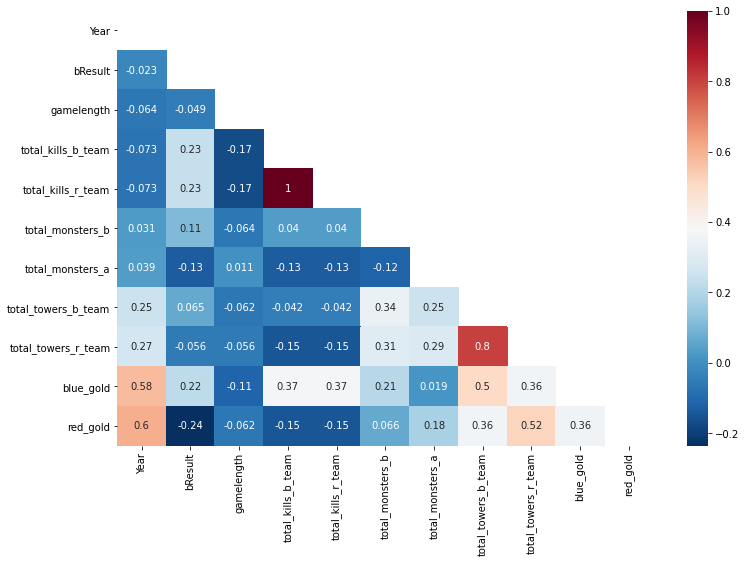

In [22]:
#check correlation
cor_df = df.corr()
lower_triangle_mask = np.triu(np.ones(cor_df.shape)).astype(np.bool)
cor_df_lower = cor_df.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
sns.heatmap(cor_df_lower, annot = True, cmap = "RdBu_r")

In [23]:
"""
#Check for unique values
categoricals = df.select_dtypes(include='object').columns

number_of_uniques_per_category = df.loc[:, categoricals].nunique()

# little plot 
number_of_uniques_per_category.plot(kind='barh',
                                    title='# uniques / categories');
plt.xlabel('Number of uniques')
plt.show()

number_of_uniques_per_category
"""

"\n#Check for unique values\ncategoricals = df.select_dtypes(include='object').columns\n\nnumber_of_uniques_per_category = df.loc[:, categoricals].nunique()\n\n# little plot \nnumber_of_uniques_per_category.plot(kind='barh',\n                                    title='# uniques / categories');\nplt.xlabel('Number of uniques')\nplt.show()\n\nnumber_of_uniques_per_category\n"

# Encoding

In [24]:
df.dtypes

Year                     int64
Season                  object
bResult                  int64
gamelength               int64
game_id                 object
total_kills_b_team     float64
total_kills_r_team     float64
total_monsters_b       float64
total_monsters_a       float64
total_towers_b_team    float64
total_towers_r_team    float64
blue_gold                int64
red_gold                 int64
dtype: object

In [25]:
#ENCODING VARIAVEIS CATEGORICAS

#Ordinal Encoder
for f in df.select_dtypes(include='object').columns:
    if f != 'game_id':
        encoder = ce.ordinal.OrdinalEncoder()

        X2 = df[[f]]
        encoder.fit(X2)

        df[f+'_Encode'] = encoder.transform(X2)
        df = df.drop(f,axis=1)


# Scalling numericals

In [26]:
numericals = df.select_dtypes(include=['int64','float64']).columns
df[numericals].describe()

,Year,bResult,gamelength,total_kills_b_team,total_kills_r_team,total_monsters_b,total_monsters_a,total_towers_b_team,total_towers_r_team,blue_gold,red_gold,Season_Encode
count,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000,4068.000000
mean,2015.593904,0.536136,37.507620,3.145526,3.145526,0.277040,0.312193,0.635939,0.607178,13005.626106,12981.887414,1.425762
std,0.528771,0.498754,8.004897,3.267210,3.267210,0.484522,0.501170,0.904300,0.895069,964.248093,951.556901,0.494519
min,2014.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10088.000000,10098.000000,1.000000
25%,2015.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12321.000000,12294.500000,1.000000
50%,2016.000000,1.000000,37.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12966.500000,12956.500000,1.000000
75%,2016.000000,1.000000,42.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,13650.250000,13614.250000,2.000000
max,2016.000000,1.000000,81.000000,28.000000,28.000000,3.000000,2.000000,5.000000,6.000000,17155.000000,17742.000000,2.000000


In [27]:
"""
##SCALE DE VARIAVEIS NUMERICAS

from sklearn.preprocessing import RobustScaler

#Features to scale

scale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']


for f in scale_list:
    # initialize transformer with desired options
    robustscaler = RobustScaler()

    # save data to scale
    X_rbs = df[[f]]

    # fit transformer to data
    robustscaler.fit(X_rbs)

    # create new feature by transforming the data
    col_new_name = f + '_robust_scaled'
    df[f] = robustscaler.transform(X_rbs)


#drop original columns
df.drop(scale_list, axis = 1)
df
"""

"\n##SCALE DE VARIAVEIS NUMERICAS\n\nfrom sklearn.preprocessing import RobustScaler\n\n#Features to scale\n\nscale_list = ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM']\n\n\nfor f in scale_list:\n    # initialize transformer with desired options\n    robustscaler = RobustScaler()\n\n    # save data to scale\n    X_rbs = df[[f]]\n\n    # fit transformer to data\n    robustscaler.fit(X_rbs)\n\n    # create new feature by transforming the data\n    col_new_name = f + '_robust_scaled'\n    df[f] = robustscaler.transform(X_rbs)\n\n\n#drop original columns\ndf.drop(scale_list, axis = 1)\ndf\n"

In [28]:
df.to_csv( dataset + '_out.csv', index=False)